In [1]:
import pickle #read pickle file
import coffea
from coffea import hist
import topcoffea.modules.HistEFT as HistEFT
import topcoffea.modules.eft_helper as efth
import gzip #read zipped pickle file
import matplotlib.pyplot as plt #plot histograms
from matplotlib.backends.backend_pdf import PdfPages
import topcoffea.modules.utils as utils
import mplhep as hep
import numpy as np

/afs/crc.nd.edu/user/h/hnelson2/miniconda3/envs/ttbarEFT-env/lib/python3.9/site-packages/coffea/util.py:154: FutureWarning: In coffea version v2023.3.0 (target date: 31 Mar 2023), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [2]:
hep.style.use("CMS")
params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
          'legend.fontsize':20}
plt.rcParams.update(params)

In [3]:
#Example usage with HistEFT: h.set_wilson_coefficients(**orig_pts)
orig_pts = {"ctGIm": 1.0, "ctGRe":0.7, "cQj38": 9.0, "cQj18": 7.0,
            "cQu8": 9.5, "cQd8": 12.0, "ctj8": 7.0, "ctu8": 9.0,
            "ctd8": 12.4, "cQj31": 3.0, "cQj11": 4.2, "cQu1": 5.5,
            "cQd1": 7.0, "ctj1": 4.4, "ctu1": 5.4, "ctd1": 7.0}

### Get Value of sow to get normalization for each sample

In [4]:
#fin = "njets_nocuts_norm.pkl.gz"
fin = "dim6top_njets.pkl.gz"

In [5]:
hists = utils.get_hist_from_pkl(fin, allow_empty=False)
print(hists)

{'njets': <HistEFT (sample,njets) instance at 0x7f510c4c8730>}


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{('ttbar_SMEFT',): array([ 0.        ,  0.        , 30.93080442, 83.86491485, 93.03606549,
       42.88422662,  9.94663361,  2.6663867 ,  0.3184539 ,  0.        ])}


<Axes: xlabel='njets', ylabel='Events'>

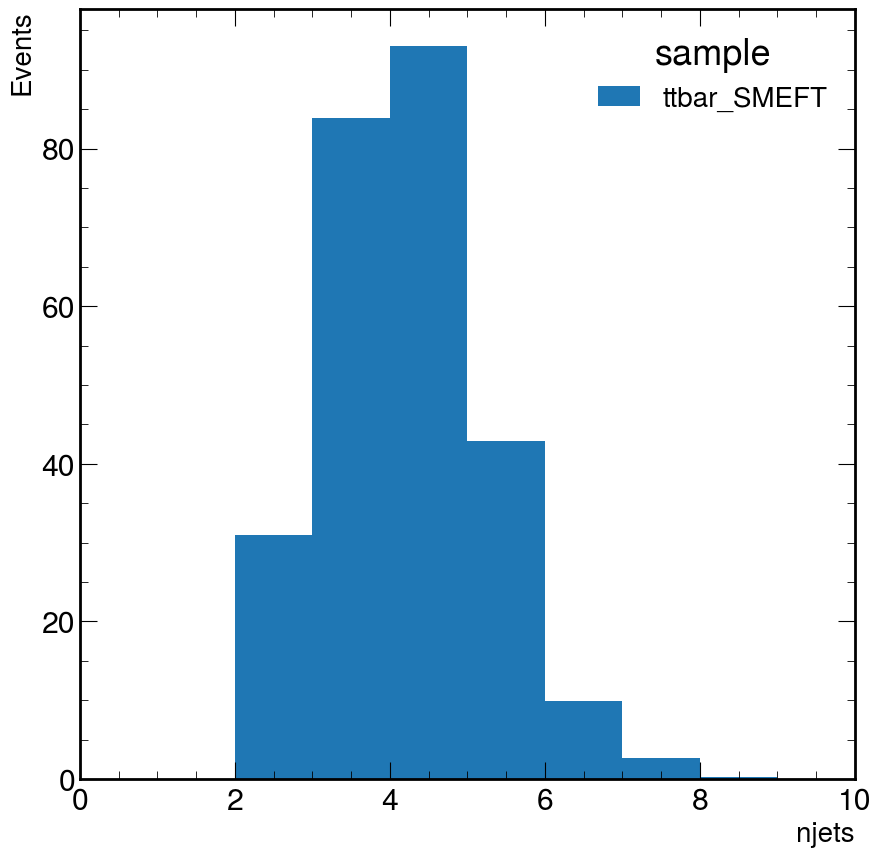

In [7]:
# Getting values for sow for normalization of samples
# ax.set_prop_cycle(color = ['blue', 'orange', 'green', 'red', 'purple', 'black'])

h = hists['njets']
h.set_sm()
#h.set_wilson_coefficients(**orig_pts)
print(h._wcs)
print(h.values())
fig, ax = plt.subplots(1,1)
hist.plot1d(h, ax=ax, stack=True)

# h = hists['nevents']
# h.set_sm()
# print(h._wcs)
# print(h.values())

### Plots of HT to check for a cut in my gridpack

In [18]:
fin = "HTcut.pkl.gz"
hists = utils.get_hist_from_pkl(fin, allow_empty=False)
print(hists)

{'LHE_HT': <HistEFT (sample,LHE_HT) instance at 0x7f50d48a97f0>, 'LHE_HTIncoming': <HistEFT (sample,LHE_HTIncoming) instance at 0x7f50d48a95b0>}


[ 7.   4.4  3.   7.   7.  12.4  0.7  1.   4.2  7.   9.  12.   5.4  5.5
  9.   9.5]
{('TT01j2l_S1',): array([0.        , 0.        , 0.00284524, 0.01358495, 0.03429711,
       0.05407137, 0.06765439, 0.07734938, 0.07287712, 0.06785272,
       0.0750146 , 0.07437133, 0.05769022, 0.06934564, 0.054542  ,
       0.05600071, 0.05218698, 0.05068936, 0.04428674, 0.04338963,
       0.04099205, 0.0364732 , 0.03839287, 0.0321242 , 0.03426755,
       0.03260907, 0.03093552, 0.0254955 , 0.02313761, 0.02100179,
       0.0206976 , 0.02072578, 0.02383396, 0.02379205, 0.01955926,
       0.01784833, 0.0192261 , 0.01457592, 0.01619284, 0.0126282 ,
       0.01099107, 0.01260932, 0.01285475, 0.00882028, 0.01022281,
       0.01313103, 0.01000149, 0.00642473, 0.00951418, 0.00998948])}


<Axes: xlabel='LHE_HT', ylabel='Events'>

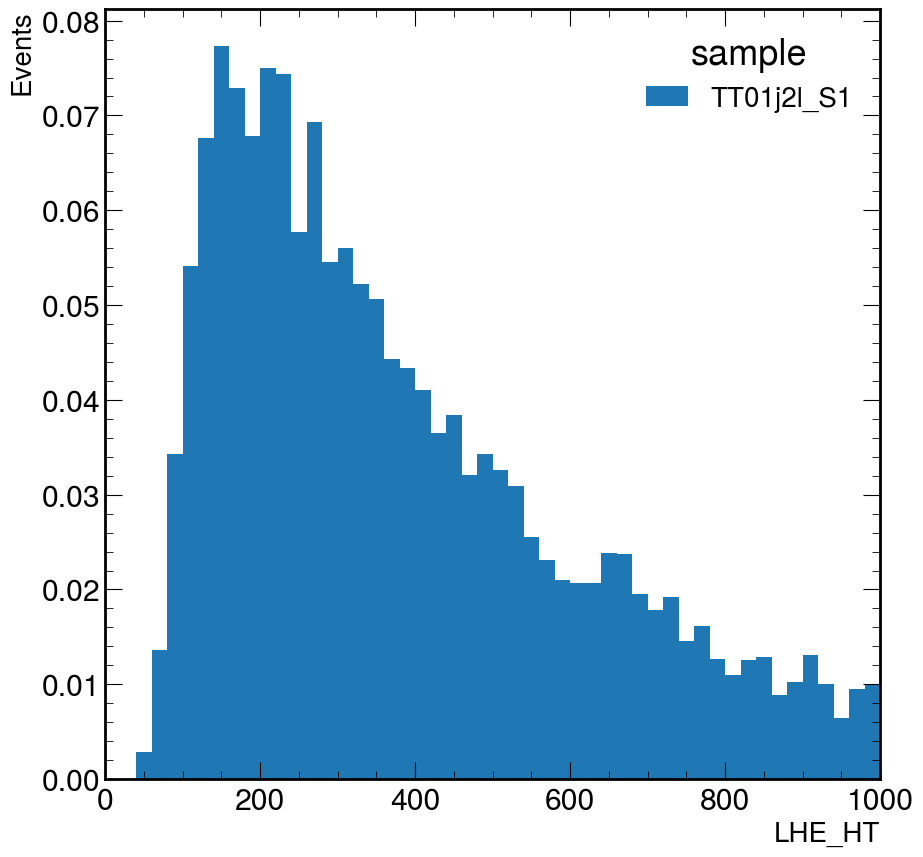

In [21]:
h = hists['LHE_HT']
# h.set_sm()
h.set_wilson_coefficients(**orig_pts)
print(h._wcs)
print(h.values())
fig, ax = plt.subplots(1,1)
hist.plot1d(h, ax=ax, stack=True)

[ 7.   4.4  3.   7.   7.  12.4  0.7  1.   4.2  7.   9.  12.   5.4  5.5
  9.   9.5]
{('TT01j2l_S1',): array([0.44198681, 0.33364174, 0.20055258, 0.13289671, 0.10010174,
       0.07669311, 0.05576602, 0.04688347, 0.03263184, 0.03331165,
       0.02739218, 0.02520889, 0.01761196, 0.01859689, 0.014068  ,
       0.01531181, 0.01260716, 0.00905313, 0.00974521, 0.00615946,
       0.00951194, 0.00813032, 0.00858295, 0.00905662, 0.00500409,
       0.00595696, 0.00619338, 0.0057212 , 0.00476697, 0.00473824,
       0.00523732, 0.00332516, 0.00284213, 0.00095465, 0.00190004,
       0.0031015 , 0.00119414, 0.00309756, 0.00285241, 0.00191693,
       0.00238583, 0.00216459, 0.00191015, 0.00263803, 0.00095692,
       0.0014284 , 0.00118538, 0.00119868, 0.00143287, 0.0009465 ])}


<Axes: xlabel='LHE_HTIncoming', ylabel='Events'>

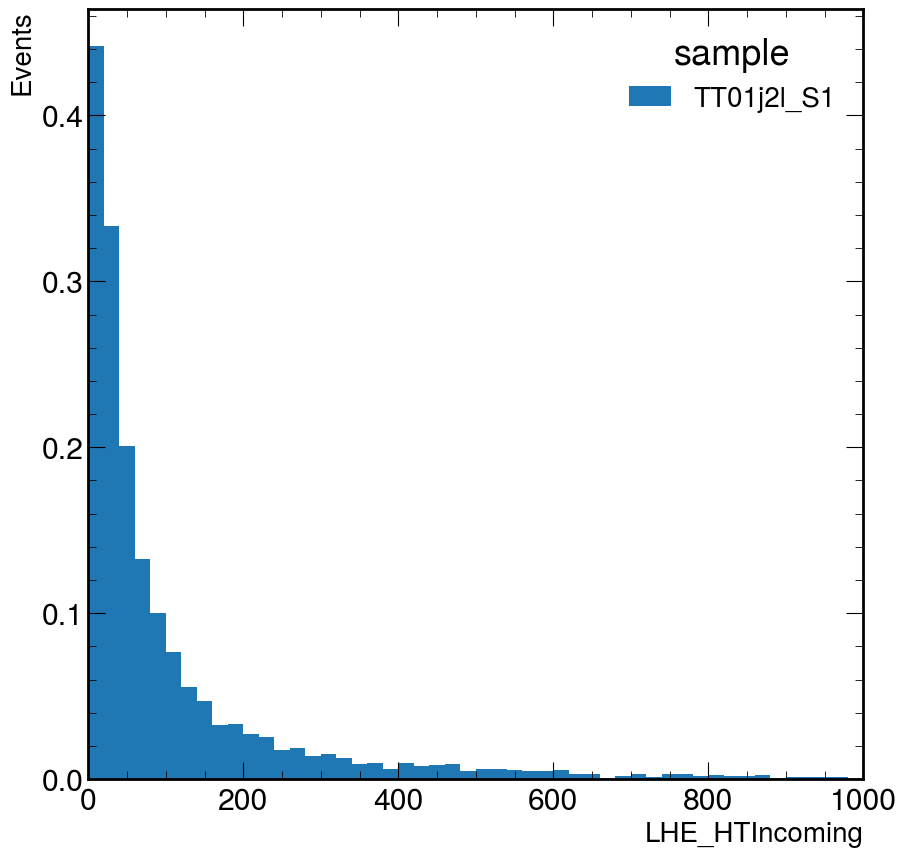

In [22]:
h = hists['LHE_HTIncoming']
# h.set_sm()
h.set_wilson_coefficients(**orig_pts)
print(h._wcs)
print(h.values())
fig, ax = plt.subplots(1,1)
hist.plot1d(h, ax=ax, stack=True)

### Make plots of all TT01j2l samples compared to central, correct normalization

In [14]:
fin = 'all_signal.pkl.gz'

In [15]:
hists = utils.get_hist_from_pkl(fin, allow_empty=False)
print(hists)

{'tops_pt': <HistEFT (sample,tops_pt) instance at 0x7fe6945d3c40>, 'ht': <HistEFT (sample,ht) instance at 0x7fe684375cd0>, 'jets_pt': <HistEFT (sample,jets_pt) instance at 0x7fe68417fb20>, 'j0pt': <HistEFT (sample,j0pt) instance at 0x7fe6798caf70>, 'ntops': <HistEFT (sample,ntops) instance at 0x7fe6798cf340>, 'njets': <HistEFT (sample,njets) instance at 0x7fe6798cf640>, 'mtt': <HistEFT (sample,mtt) instance at 0x7fe6798cf940>, 'nleps': <HistEFT (sample,nleps) instance at 0x7fe6798cfc40>, 'mll': <HistEFT (sample,mll) instance at 0x7fe6798cff40>}


In [19]:
def plot_hist_sm(hists, name):
    h = hists[name]
    h.set_sm()
    # print(name, h.values())
    fig, ax = plt.subplots(1,1) #create an axis for plotting
    hist.plot1d(h, ax=ax, stack=False)
    ax.legend()
    fig.suptitle("Reweighted to SM")
    plt.show()

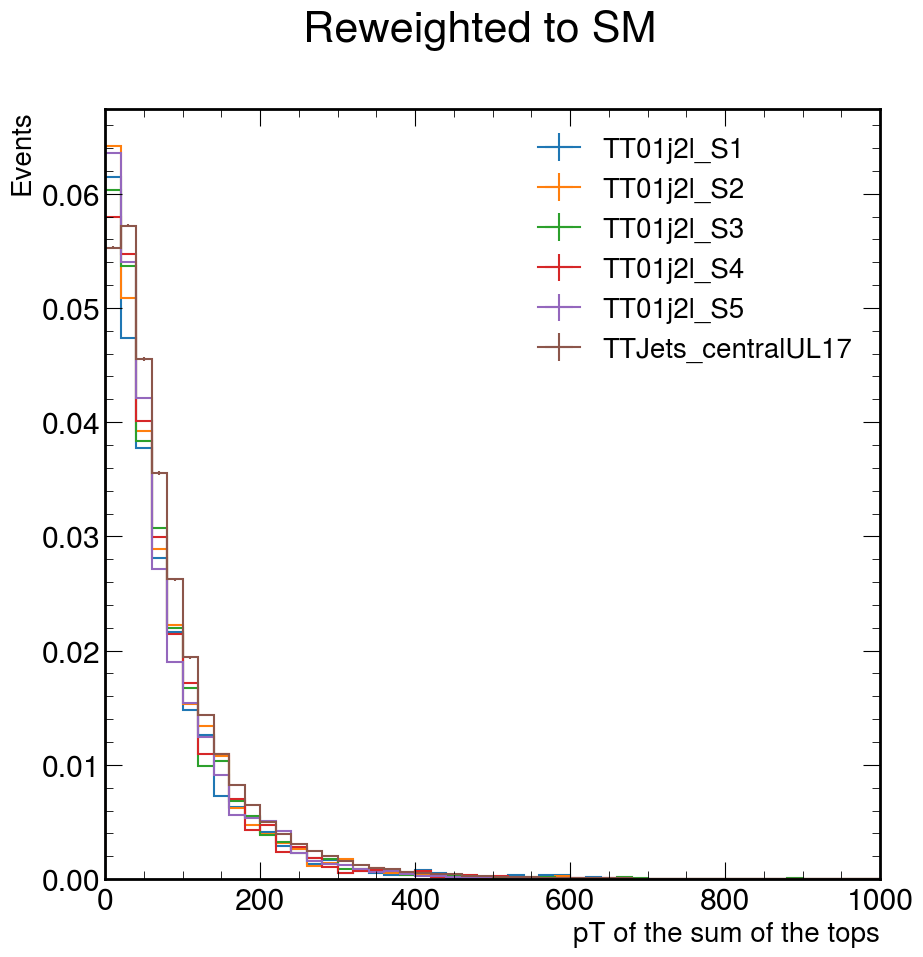

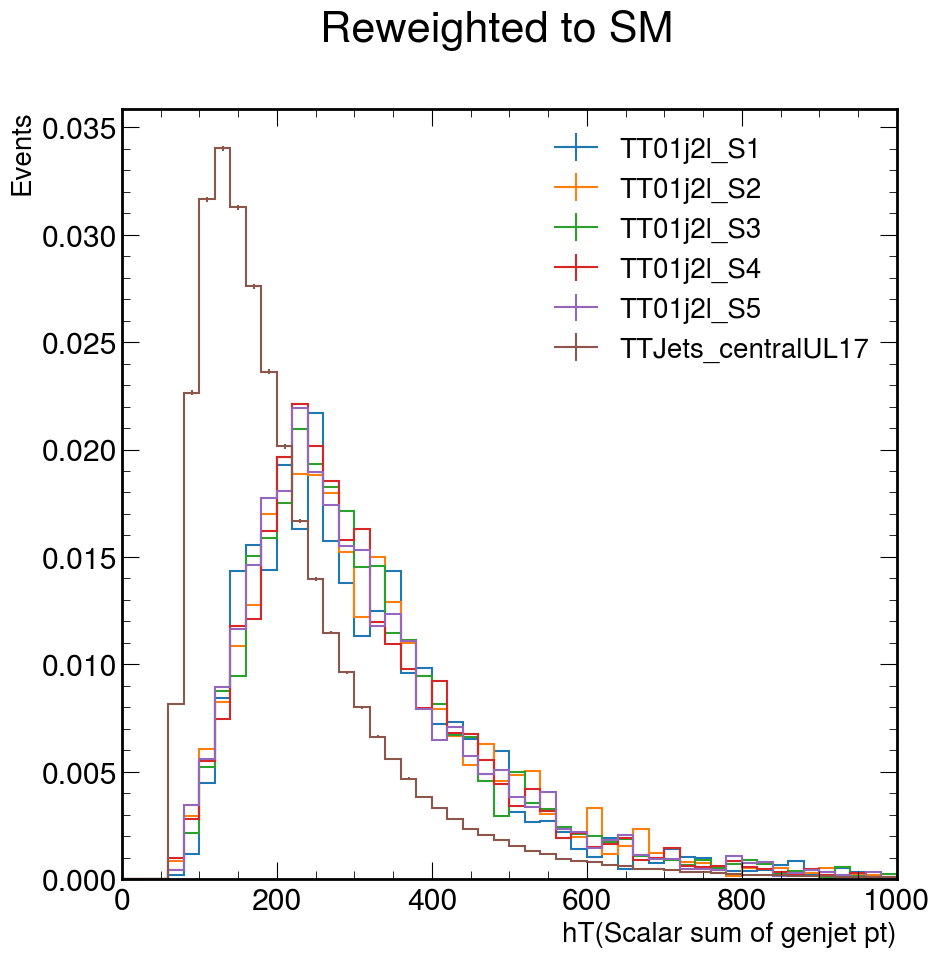

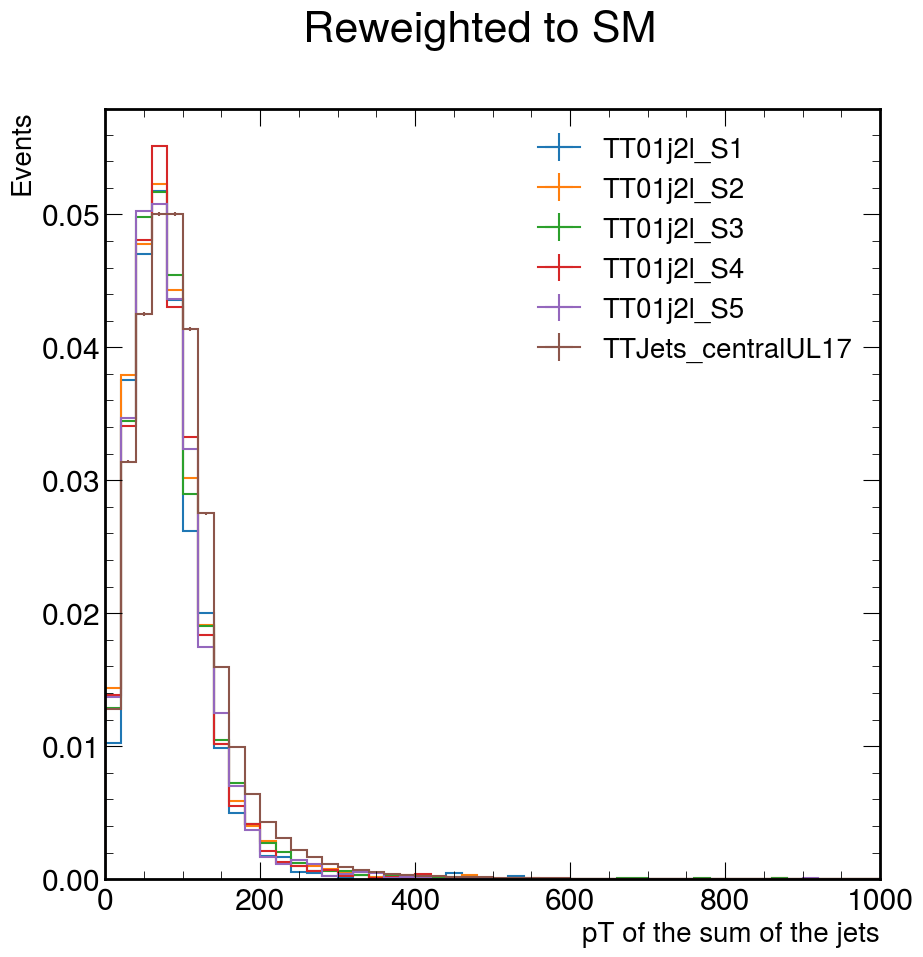

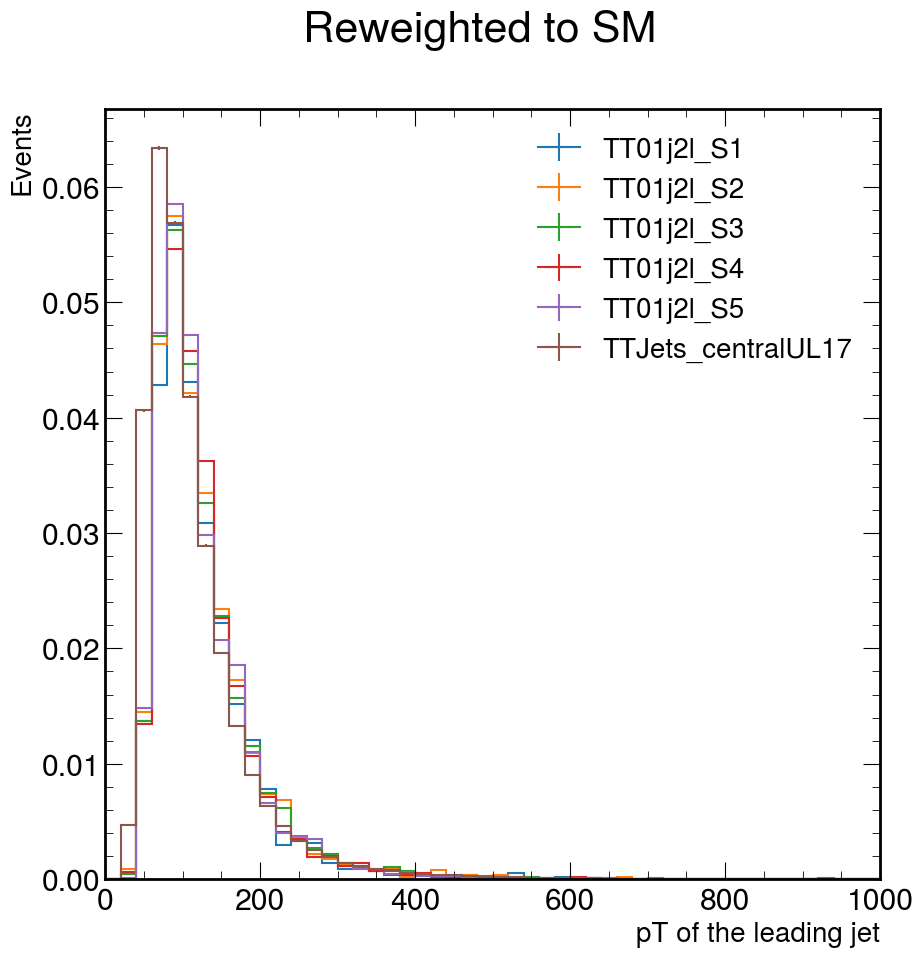

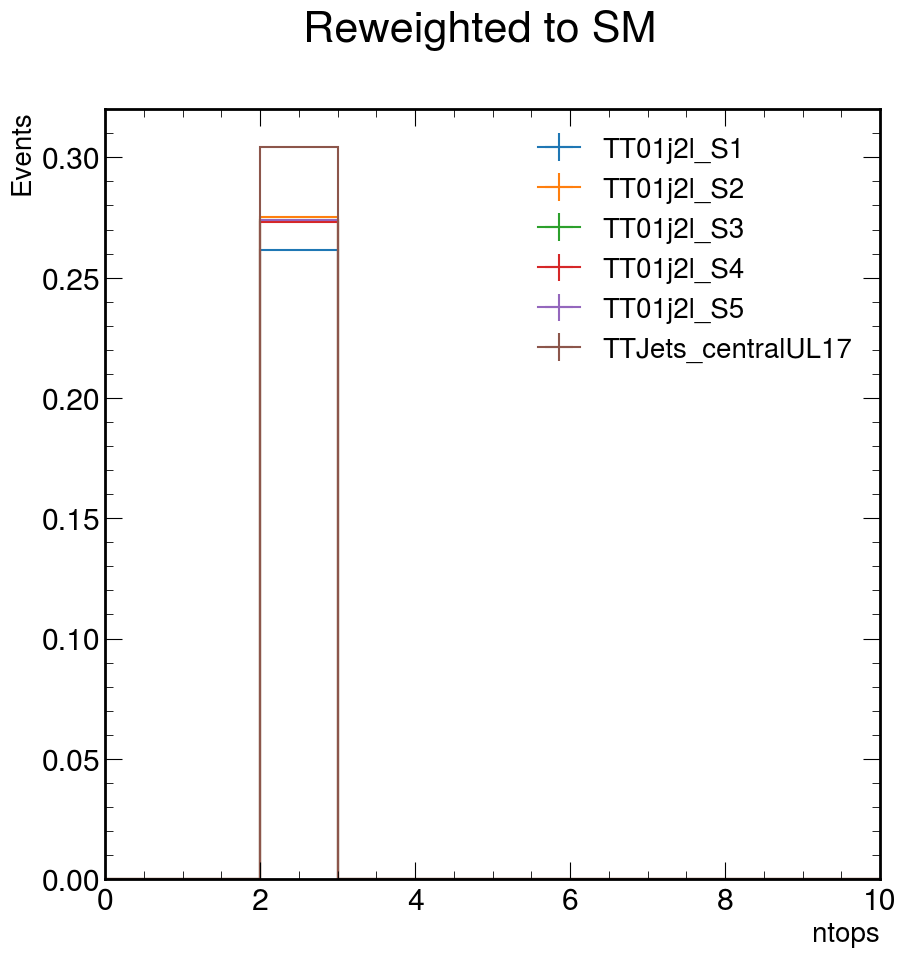

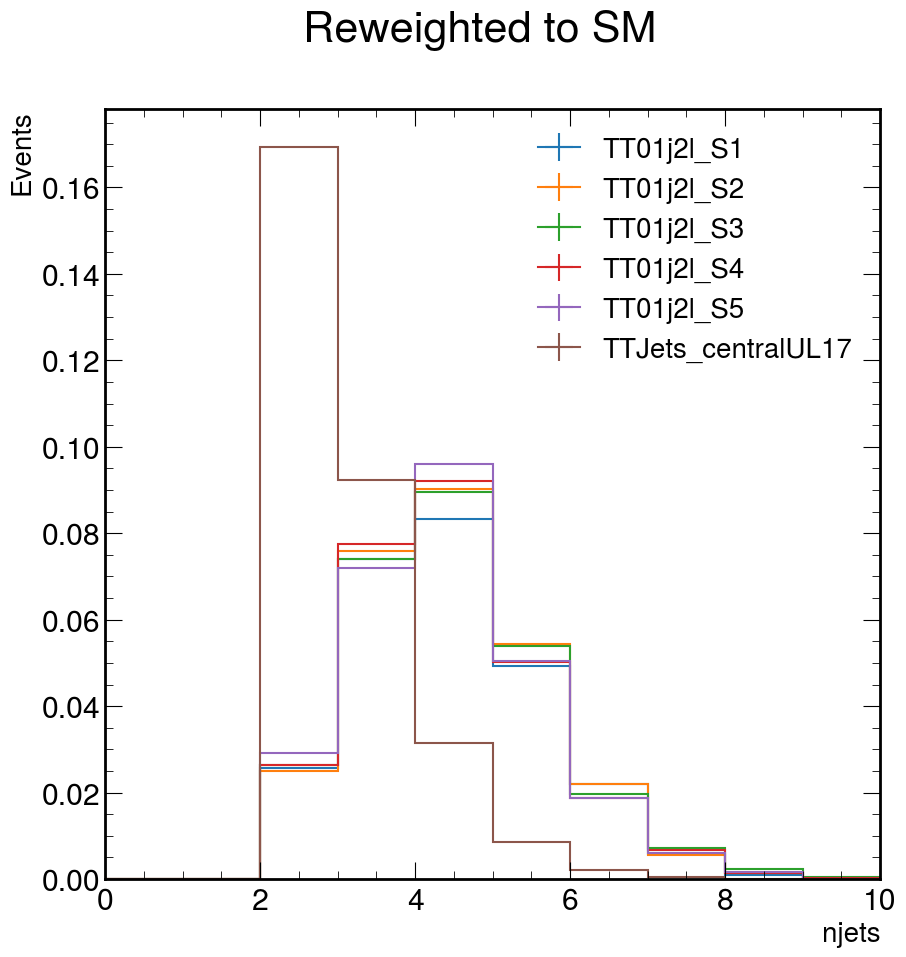

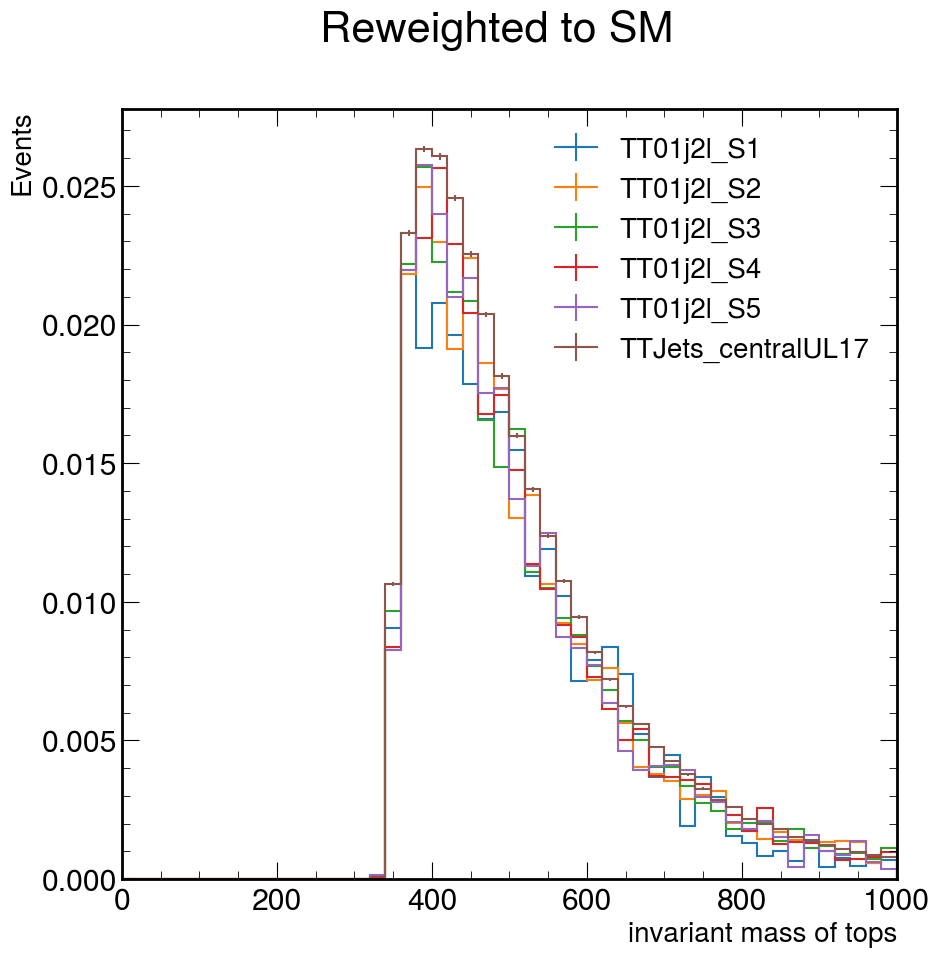

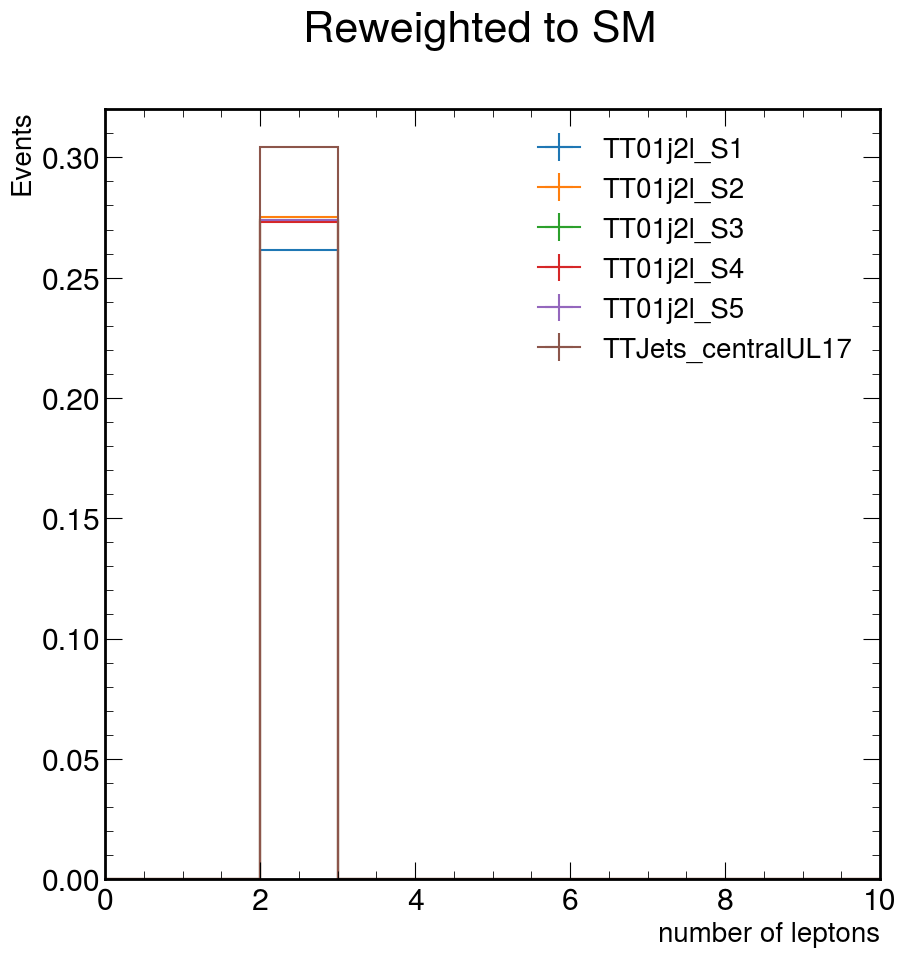

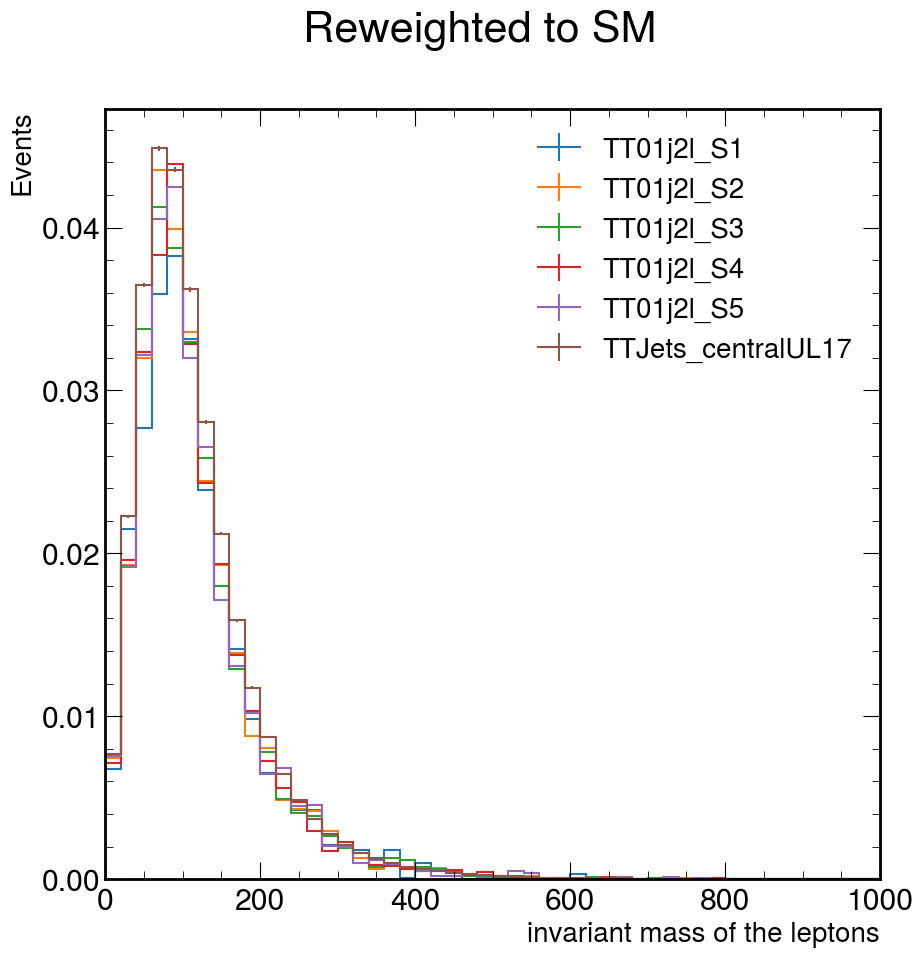

In [20]:
for name in hists:
    plot_hist_sm(hists, name)

### Check DRJ plots from nanoGen

In [ ]:
fin = "HTcut.pkl.gz"
hists = utils.get_hist_from_pkl(fin, allow_empty=False)
print(hists)